# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}' # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric' # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] # YOUR CODE HERE
        city_lng = city_weather['coord']['lon'] # YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max'] # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity'] # YOUR CODE HERE
        city_clouds = city_weather['clouds']['all'] # YOUR CODE HERE
        city_wind = city_weather['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt'] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 3 of Set 1 | kavalerovo
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | kailua-kona
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | hammerfest
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | asau
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | axim
Processing Record 14 of Set 1 | al bawiti
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | pasuquin
Processing Record 18 of Set 1 | banda aceh
Processing Record 19 of Set 1 | kununurra
Processing Record 20 of Set 1 | bulungu
Processing Record 21 of Set 1 | port-aux-francais
Processing Recor

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,6.26,79,63,1.32,CL,2024-08-25 05:36:45
1,kavalerovo,44.2661,135.0572,17.36,93,100,1.96,RU,2024-08-25 05:41:01
2,blackmans bay,-43.0167,147.3167,16.52,75,100,2.24,AU,2024-08-25 05:41:02
3,kailua-kona,19.6406,-155.9956,27.98,93,75,7.20,US,2024-08-25 05:41:04
4,waitangi,-43.9535,-176.5597,11.01,96,94,1.79,NZ,2024-08-25 05:41:05


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,6.26,79,63,1.32,CL,2024-08-25 05:36:45
1,kavalerovo,44.2661,135.0572,17.36,93,100,1.96,RU,2024-08-25 05:41:01
2,blackmans bay,-43.0167,147.3167,16.52,75,100,2.24,AU,2024-08-25 05:41:02
3,kailua-kona,19.6406,-155.9956,27.98,93,75,7.20,US,2024-08-25 05:41:04
4,waitangi,-43.9535,-176.5597,11.01,96,94,1.79,NZ,2024-08-25 05:41:05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

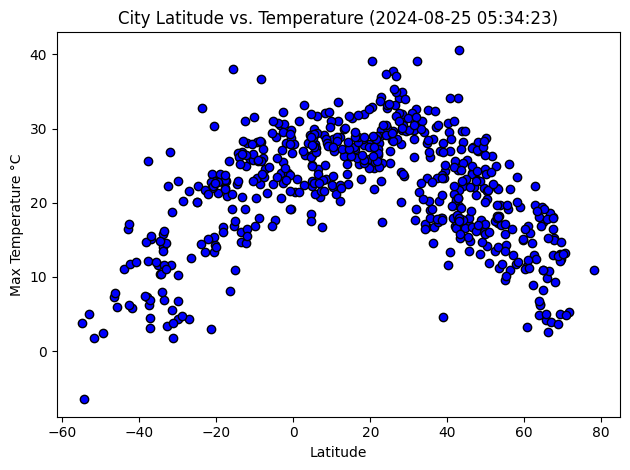

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(False)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

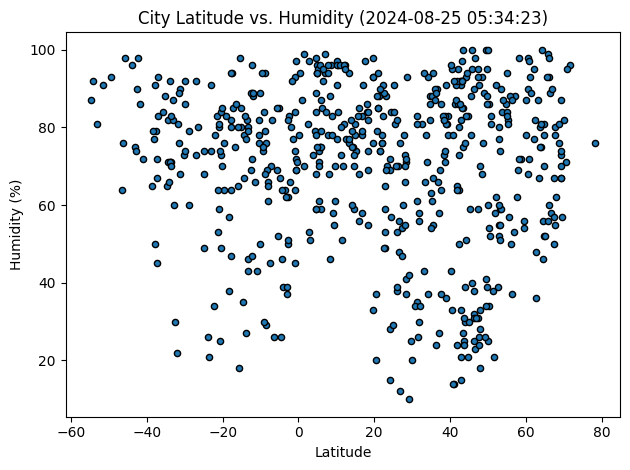

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(False)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

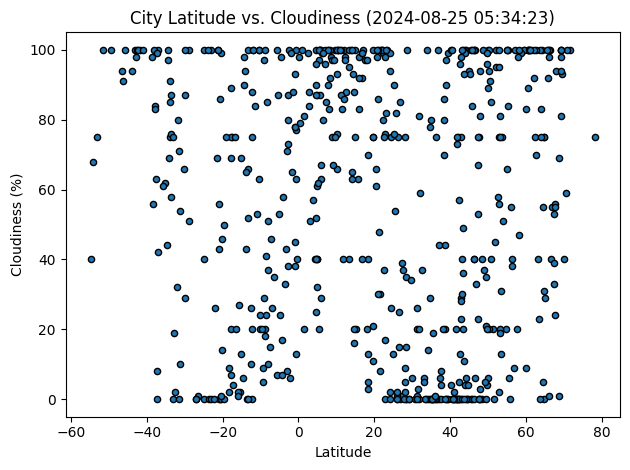

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(False)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

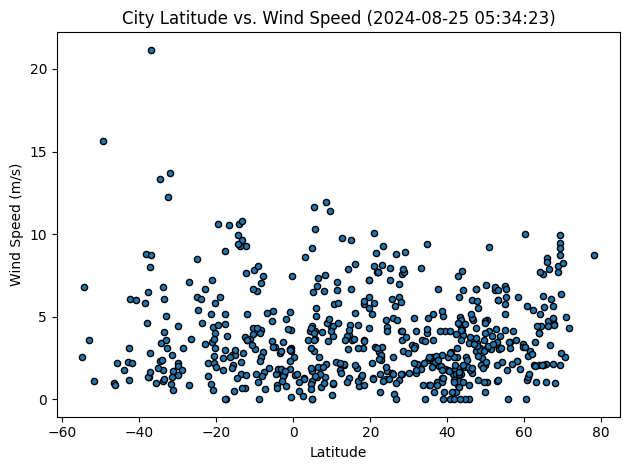

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(False)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [226]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def LinearR(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    plt.grid(False)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    plt.text(0.02, -0.2, line_eq, transform=plt.gca().transAxes, fontsize=20, color='red', horizontalalignment='left', verticalalignment='bottom')
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')


In [107]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kavalerovo,44.2661,135.0572,17.36,93,100,1.96,RU,2024-08-25 05:41:01
3,kailua-kona,19.6406,-155.9956,27.98,93,75,7.20,US,2024-08-25 05:41:04
5,hammerfest,70.6634,23.6821,13.25,71,59,2.57,NO,2024-08-25 05:41:06
9,asau,46.4333,26.4000,23.99,32,40,1.58,RO,2024-08-25 05:41:11
11,axim,4.8699,-2.2405,22.28,96,61,1.13,GH,2024-08-25 05:41:13


In [108]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,6.26,79,63,1.32,CL,2024-08-25 05:36:45
2,blackmans bay,-43.0167,147.3167,16.52,75,100,2.24,AU,2024-08-25 05:41:02
4,waitangi,-43.9535,-176.5597,11.01,96,94,1.79,NZ,2024-08-25 05:41:05
6,edinburgh of the seven seas,-37.0676,-12.3116,15.10,83,100,21.16,SH,2024-08-25 05:41:07
7,puerto natales,-51.7236,-72.4875,1.77,91,100,1.13,CL,2024-08-25 05:41:09


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.25x + 31.4
The r-value is: -0.661062603095126


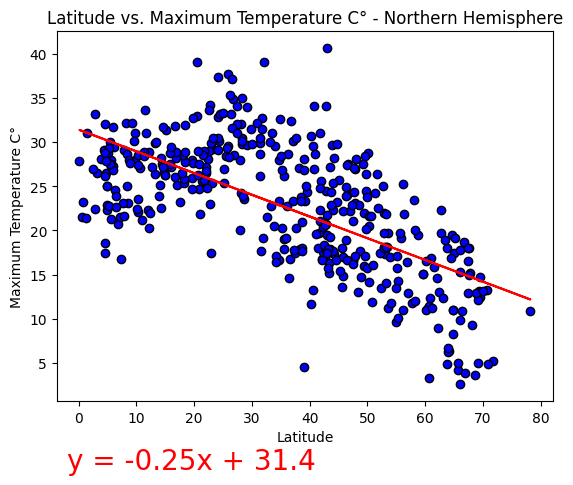

In [227]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
# plt.grid(False)
# plt.xlabel("Latitude")
# plt.ylabel("Max Temp")
# plt.title("Latitude vs. Temperature in Northern Hemisphere")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'

LinearR(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.46x + 28.21
The r-value is: 0.7530001518051461


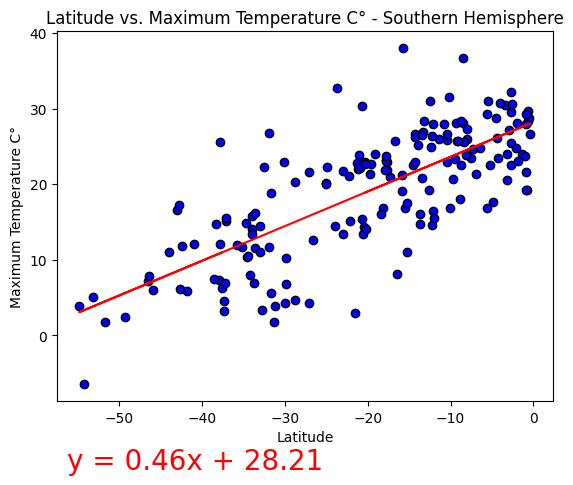

In [231]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'


LinearR(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

Analysis suggests that in the Northern Hemisphere (with negtive slope), as you move away from the equator (i.e., as latitude increases), the maximum temperature generally decreases. This trend is consistent with the expected pattern, where regions closer to the equator tend to have higher temperatures, while regions further from the equator tend to be cooler.

In the Southern Hemisphere, on the other hand, (with positive slope) there is a clear trend where maximum temperature increases as you move closer to the equator (as latitude increases towards zero). The positive slope of the regression line supports this, showing a strong positive correlation between latitude and temperature. This relationship aligns with the expected climatic patterns, where equatorial regions are warmer than those further south.


### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = -0.13x + 74.57
The r-value is: -0.11551113567277306


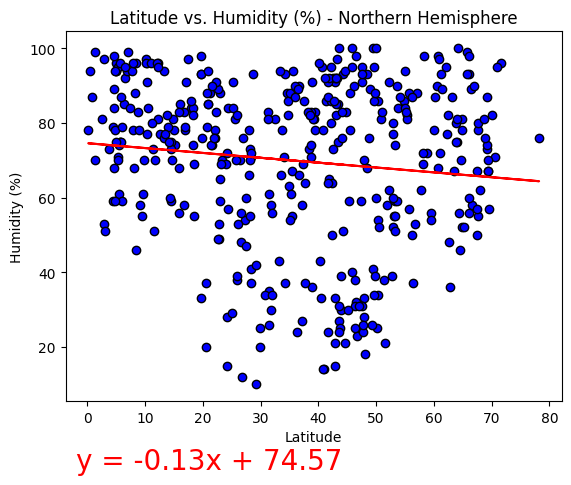

In [228]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')


x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'


LinearR(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.31x + 64.4
The r-value is: -0.22760510388978744


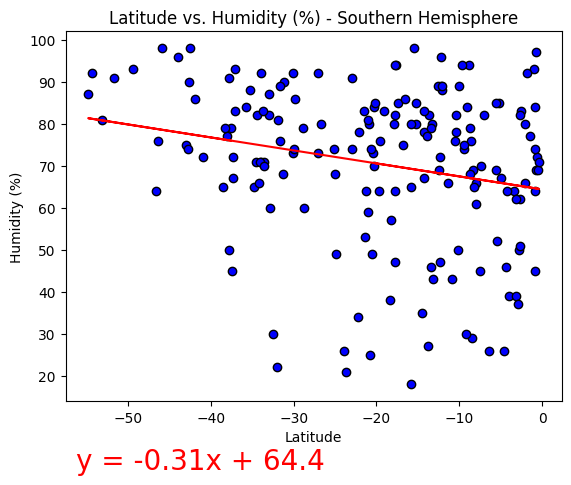

In [230]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'

LinearR(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

Analysis suggests that in the Northern Hemisphere, there is a very slight trend where humidity decreases as latitude increases, but the relationship is weak. The majority of the variation in humidity is likely due to factors other than latitude, as evidenced by the broad scatter of data points around the regression line.

Meanwhile in the Southern Hemisphere the negative slope (-0.31) indicates that humidity tends to decrease slightly as latitude increases towards the equator, despite the trend, there’s considerable scatter among the data points, meaning other factors besides latitude also influence humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = -0.22x + 62.93
The r-value is: -0.10845278400272834


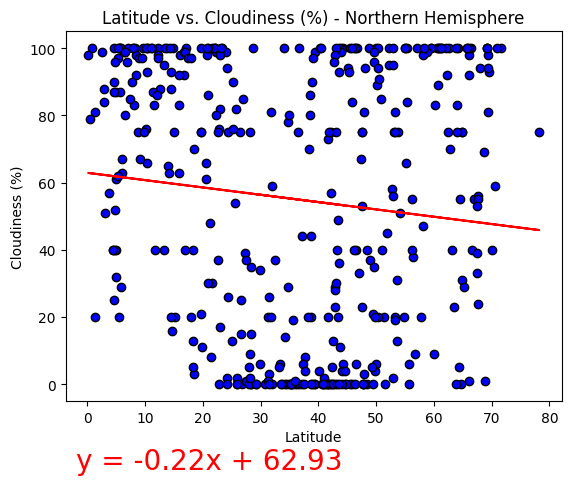

In [232]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'

LinearR(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.56x + 42.79
The r-value is: -0.21188696834473764


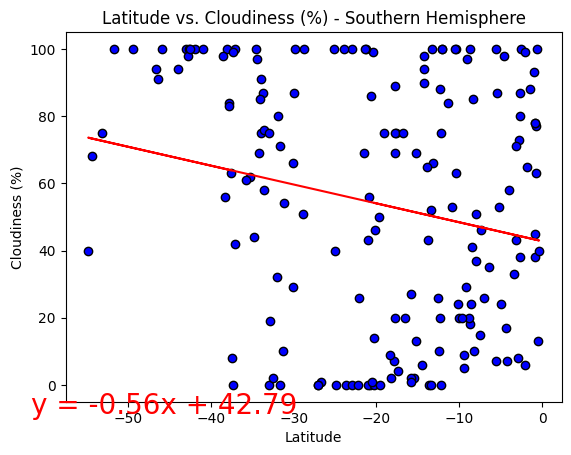

In [208]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'

LinearR(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

Data suggest that in Northern Hemisphere the negative slope (-0.22) indicates that cloudiness tends to decrease slightly as latitude increases, despite the trend, there’s considerable scatter among the data points, meaning other factors besides latitude also influence cloudiness levels.

In Southern Hemisphere the negative slope (-0.56) indicates that cloudiness tends to decrease as latitude increases towards the equator , there’s considerable scatter among the data points, meaning other factors besides latitude also influence cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.01x + 3.51
The r-value is: 0.040625622060249854


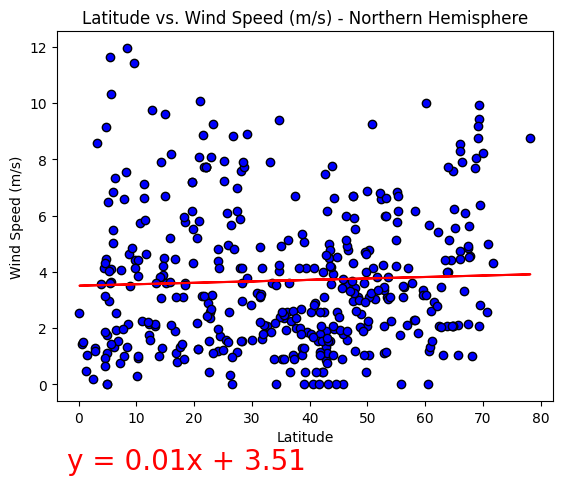

In [233]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'

LinearR(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.03x + 3.37
The r-value is: -0.13115740578138987


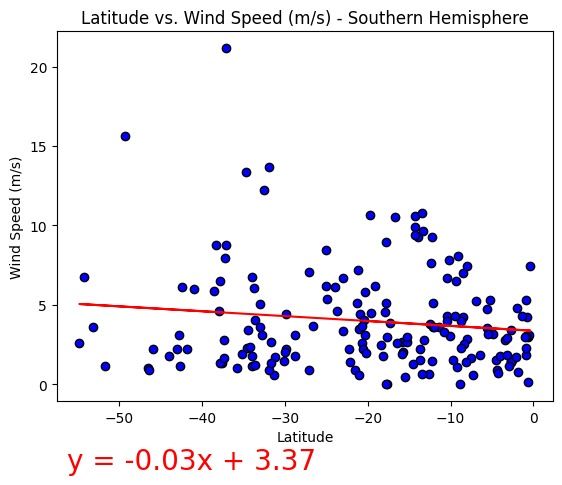

In [234]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'

LinearR(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 
In Northern Hemisphere with a positive slope (0.01) indicates that wind speed tends to increase slightly as latitude increases, however, the slope is very small, suggesting that latitude has a minimal effect on wind speed, despite the trend, there’s considerable scatter among the data points, meaning other factors besides latitude also influence wind speed.

Meanwhile in Southern Hemisphere the negative slope (-0.03) indicates that wind speed tends to decrease slightly as latitude increases towards the equator. However, the slope is very small, suggesting that latitude has a minimal effect on wind speed, despite the trend, there’s considerable scatter among the data points, meaning other factors besides latitude also influence wind speed.